# <center> **Final Project** <center>
## <center>Social Data Analysis and Visualization</center>
### <center>s214715 & s214742</center>

## **1.0 Motivation**
### **1.1 The Dataset**

The dataset describes DOHMH New York City Restaurant Inspection Results, consisting of 224,115 records across 27 columns. Each column encodes a factor that describes the hygiene conditions of the restaurants. More information can be found here: (https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data). When following the provided link a document can be downloaded describing the meaning behind various parameters in the dataset! 

The dataset is particularly fascinating because it allows us to explore potential correlations among key parameters such as restaurant location, recorded violations, inspection scores, and types of cuisine. By analyzing these elements, we aim to provide insights that not only guide readers in making safer dining choices but also inspire them to engage in their own investigations through our interactive plots. This interactive exploration aims to empower consumers with the knowledge needed to make informed decisions about where to eat.


To provide a geographical perspective on restaurant options, the analysis also incorporates a dataset that describes the boundaries of 178 zip codes in New York City. More information on this dataset can be found here: https://data.cityofnewyork.us/Health/Modified-Zip-Code-Tabulation-Areas-MODZCTA-/pri4-ifjk/about_data. 


Additional essential information regarding the DOHMH New York City Restaurant Inspection Results dataset is shown in the following: 

In [1]:
import pandas as pd
import numpy as np
path = '/Users/thomasstycke/Desktop/DTU/SocialData/Assignment3/FinalProject/'

df = pd.read_csv(path + 'DOHMH_New_York_City_Restaurant_Inspection_Results_20240414.csv')
print(df.info())
print(f'Total size in memory: {df.memory_usage(deep=True).sum() / 1024 ** 2} MB')
num_rows = df.shape[0]
print(f'Number of rows: {num_rows}')
num_camis = df['CAMIS'].nunique()
print(f'Number of unique CAMIS: {num_camis}')

/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224115 entries, 0 to 224114
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  224115 non-null  int64  
 1   DBA                    223560 non-null  object 
 2   BORO                   224115 non-null  object 
 3   BUILDING               223713 non-null  object 
 4   STREET                 224112 non-null  object 
 5   ZIPCODE                221345 non-null  float64
 6   PHONE                  224112 non-null  object 
 7   CUISINE DESCRIPTION    221820 non-null  object 
 8   INSPECTION DATE        224115 non-null  object 
 9   ACTION                 221820 non-null  object 
 10  VIOLATION CODE         220671 non-null  object 
 11  VIOLATION DESCRIPTION  220671 non-null  object 
 12  CRITICAL FLAG          224115 non-null  object 
 13  SCORE                  213381 non-null  float64
 14  GRADE                  110382 non-nu

In [2]:
print(df.columns)

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')


## **2.0 Basic Stats**: Data Cleaning and Preprocessing

#### **2.1 Inspection Date**
Since the dataset contains 27 distinct columns, it is essential to select which ones to focus on, both for our clarity and to avoid overwhelming the reader with too many parameters. We begin our analysis by examining the dataset's update frequency:

In [3]:
#Years the dataset contains data for
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
unique_years = df['INSPECTION DATE'].dt.year.unique()
unique_years = np.sort(unique_years)
print(unique_years)

[1900 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


Given our goal to provide a guide for tourists, locals, and others, we have decided to streamline the dataset by focusing exclusively on the most recent inspection results. This approach not only reduces the dataset's size, making it more manageable but also ensures that the content is up-to-date, thereby providing them with the most relevant and current information.

In [4]:
def filter_inspections(input_df):
    # Filter the DataFrame for the inspection types and grades
    df = input_df[input_df['INSPECTION TYPE'].isin([
        'Cycle Inspection / Re-inspection',
        'Pre-permit (Operational) / Re-inspection',
        'Cycle Inspection / Initial Inspection',
        'Pre-permit (Operational) / Initial Inspection',
        'Pre-permit (Operational) / Reopening Inspection',
        'Cycle Inspection / Reopening Inspection'
    ]) & input_df['GRADE'].isin(['A', 'B', 'C', 'P', 'Z'])]

    # Convert the inspection date to datetime
    df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])

    # Sort the DataFrame by inspection date and keep the last row for each restaurant
    df_filtered = df.sort_values('INSPECTION DATE').groupby('CAMIS').last().reset_index()

    # Add all rows where CAMIS and INSPECTION DATE match between df_filtered and df
    df_filtered = pd.concat([
        df_filtered,
        df[df.set_index(['CAMIS', 'INSPECTION DATE']).index.isin(df_filtered.set_index(['CAMIS', 'INSPECTION DATE']).index)]
    ]).drop_duplicates()

    # Sort data by 'INSPECTION YEAR' descending
    df_filtered = df_filtered.sort_values(by='INSPECTION YEAR', ascending=False)
    df_filtered['INSPECTION YEAR'] = pd.to_datetime(df_filtered['INSPECTION DATE']).dt.year

    return df_filtered

# Sort data by INSPECTION YEAR 
df['INSPECTION YEAR'] = pd.to_datetime(df['INSPECTION DATE']).dt.year
df = df.sort_values(by='INSPECTION YEAR')

# Delete 1900, 2015, 2024 because they are not full valid years
df = df[~df['INSPECTION YEAR'].isin([1900, 2015])]

df_filtered = filter_inspections(df)

/var/folders/m4/lvsr74wx0q925cvzc6z0g13r0000gn/T/ipykernel_90626/430425910.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])


#### **2.2 Violation Codes**
In the dataset the inspection result is described in different ways: as a GRADE, SCORE determined by the VIOLATION CODES that has been recorded which all have been used to flag whether the situation in the restaurant is Critical or Not Critical in the CRITICAL FLAG header. 
We find it interesting to look into which types or violations are most present and our goal is to search for a pattern in the different violations, whether it is in the type of restaurant or the geographical location. But to do this we have to learn more about the violation codes. We look into the top 10 most recoreded violations from the latest record of each restaurant.


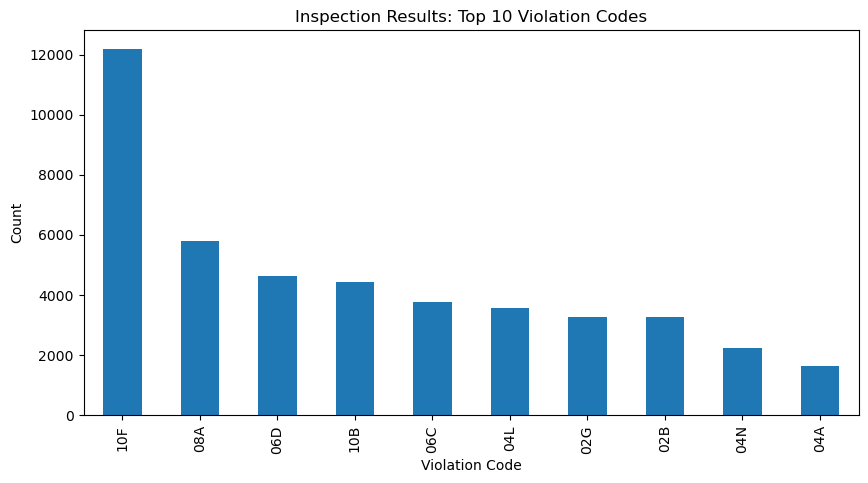

In [5]:
import matplotlib.pyplot as plt
# Count the occurrences of each violation code and get the top 10
violation_counts = df_filtered['VIOLATION CODE'].value_counts().head(10)

# Plot a histogram
plt.figure(figsize=(10, 5))
violation_counts.plot(kind='bar')
plt.title('Inspection Results: Top 10 Violation Codes')
plt.xlabel('Violation Code')
plt.ylabel('Count')
plt.show()

The plot tells us that 10F is the most frequent violation code recorded! But what does all these codes mean? We want to look into the meaning of them:

In [6]:
grouped = df_filtered.groupby(['VIOLATION CODE', 'VIOLATION DESCRIPTION']).size()
print(grouped)

VIOLATION CODE  VIOLATION DESCRIPTION                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
02A             Food not cooked

The length of the list of violation descriptions is 122. That makes it really unmanageable for a reader to understand. To help the reader we want to categorize them into several themes that capture common patterns:
<ol>
  <li style="margin-bottom: 15px;"><strong>Temperature Control and Food Preparation Standards</strong>
      <br><span style="font-size: 10px;">Codes: 02A, 02B, 02C, 02F, 02G, 02H, 02I. Details: These codes concern the proper cooking, holding, cooling, and preparation of food to safe temperatures to prevent bacterial growth and ensure food safety.</span></li>

  <li style="margin-bottom: 15px;"><strong>Facility and Equipment Sanitation</strong>
      <br><span style="font-size: 10px;">Codes: 05C, 05F, 05H, 06D, 06E, 06F, 09C, 10F, 10G, 10H. Details: These involve violations related to the cleanliness and proper maintenance of food contact surfaces, as well as the adequacy of the facility's washing and sanitizing equipment and processes.</span></li>

  <li style="margin-bottom: 15px;"><strong>Food Sourcing and Labeling</strong>
      <br><span style="font-size: 10px;">Codes: 03A, 03B, 03C, 03I, 04P, 08B, 09A, 16B, 16C, 16D, 16E, 18G. Details: Violations here include issues with unapproved food sources, improper labeling, and adherence to regulations regarding consumer information about food products.</span></li>

  <li style="margin-bottom: 15px;"><strong>Personal Hygiene and Employee Behavior</strong>
      <br><span style="font-size: 10px;">Codes: 04C, 04D, 06A, 06B, 06C. Details: This group focuses on the behavior and cleanliness of personnel handling food, including proper handwashing, avoiding contamination, and maintaining clean uniforms.</span></li>

  <li style="margin-bottom: 15px;"><strong>Facility Infrastructure and Safety</strong>
      <br><span style="font-size: 10px;">Codes: 05A, 05B, 05D, 05E, 10A, 10B, 10C, 10D, 10E. Details: These codes relate to the structural integrity and safety features of the facility, including proper sewage disposal, ventilation, lighting, and adequate hand washing facilities.</span></li>

  <li style="margin-bottom: 15px;"><strong>Environmental Health and Pest Control</strong>
      <br><span style="font-size: 10px;">Codes: 04K, 04L, 04M, 04N, 08A, 08C. Details: This category includes violations regarding the presence of pests, vermin, and other environmental health concerns that could affect food safety.</span></li>
      
  <li style="margin-bottom: 15px;"><strong>Toxic Substances and Hazardous Materials</strong>
      <br><span style="font-size: 10px;">Codes: 04E, 04F, 05B. Details: These violations concern the proper handling, storage, and labeling of chemicals and toxic substances to prevent contamination of food products.</span></li>
</ol>


In [7]:
violation_groups = {
    'Temperature Control': ['02A', '02B', '02C', '02F', '02G', '02H', '02I'],
    'Facility Sanitation': ['05C', '05F', '05H', '06D', '06E', '06F', '09C', '10F', '10G', '10H'],
    'Food Sourcing and Labeling': ['03A', '03B', '03C', '03I', '04P', '08B', '09A', '16B', '16C', '16D', '16E', '18G'],
    'Staff Hygiene': ['04C', '04D', '06A', '06B', '06C'],
    'Facility Maintenance': ['05A', '05B', '05D', '05E', '10A', '10B', '10C', '10D', '10E'],
    'Pest Control': ['04K', '04L', '04M', '04N', '08A', '08C'],
    'Chemical Safety': ['04E', '04F', '05B'],
}

# Create a separate DataFrame for each group of violations
food_temp_df = df_filtered[df_filtered['VIOLATION CODE'].isin(violation_groups['Temperature Control'])].assign(Group='Temperature Control')
facility_sanitation_df = df_filtered[df_filtered['VIOLATION CODE'].isin(violation_groups['Facility Sanitation'])].assign(Group='Facility Sanitation')
food_origin_df = df_filtered[df_filtered['VIOLATION CODE'].isin(violation_groups['Food Sourcing and Labeling'])].assign(Group='Food Sourcing and Labeling')
staff_hygiene_df = df_filtered[df_filtered['VIOLATION CODE'].isin(violation_groups['Staff Hygiene'])].assign(Group='Staff Hygiene')
facility_maintenance_df = df_filtered[df_filtered['VIOLATION CODE'].isin(violation_groups['Facility Maintenance'])].assign(Group='Facility Maintenance')
pest_control_df = df_filtered[df_filtered['VIOLATION CODE'].isin(violation_groups['Pest Control'])].assign(Group='Pest Control')
chemical_safety_df = df_filtered[df_filtered['VIOLATION CODE'].isin(violation_groups['Chemical Safety'])].assign(Group='Chemical Safety')

all_violations_df = pd.concat([food_temp_df, facility_sanitation_df, food_origin_df, staff_hygiene_df, facility_maintenance_df, pest_control_df, chemical_safety_df])

#### **2.3 Cuisine Description**
Another interesting parameter in the dataset is the CUISINE DESCRIPTION, which describes what kind of food is being served at the inspected restaurant. Such information is easy to explain to a reader and is an essential factor when choosing where to eat! The different cuisines recorded in the dataset is: 

In [8]:
# Group by 'CUISINE DESCRIPTION' and 'Group', and count the number of violations in each group for each cuisine
grouped = all_violations_df.groupby(['CUISINE DESCRIPTION', 'Group']).size()
# Reset the index of the grouped DataFrame and rename the columns
grouped = grouped.reset_index().rename(columns={0: 'Count'})
# Find the violation group with the most violations for each cuisine
most_present = grouped.loc[grouped.groupby('CUISINE DESCRIPTION')['Count'].idxmax()]
print(most_present)

    CUISINE DESCRIPTION                Group  Count
2                Afghan         Pest Control     29
8               African         Pest Control     80
13             American  Facility Sanitation   4543
20             Armenian         Pest Control      4
25   Asian/Asian Fusion  Facility Sanitation    389
..                  ...                  ...    ...
473             Tex-Mex  Facility Sanitation    340
479                Thai  Facility Sanitation    278
486             Turkish  Facility Sanitation     50
492               Vegan  Facility Sanitation     62
498          Vegetarian  Facility Sanitation     70

[89 rows x 3 columns]


Well that's alot and can be very confusing for a reader to navigate between. To make these more manageable we here too divide the different cuisines into bigger groups to make it easier for the reader to navigate through our story. The groups we choose to divide them into is based on the most popular cuisines/dishes:
<ol>
  <li style="margin-bottom: 15px;"><strong>Burgers:</strong> <span style="font-size: 10px;">American, Californian, New American, Steakhouse, Chicken, Barbecue, Hamburgers.</span></li>
  <li style="margin-bottom: 15px;"><strong>Sandwiches:</strong> <span style="font-size: 10px;">Sandwiches, Sandwiches/Salads/Mixed Buffet, Soups/Salads/Sandwiches.</span></li>
  <li style="margin-bottom: 15px;"><strong>Hotdogs:</strong> <span style="font-size: 10px;">Hotdogs, Hotdogs/Pretzels.</span></li>
  <li style="margin-bottom: 15px;"><strong>Mexican:</strong> <span style="font-size: 10px;">Mexican, Tex-Mex, Peruvian, Chimichurri, Chilean, Caribbean, Latin American.</span></li>
  <li style="margin-bottom: 15px;"><strong>Pizza:</strong> <span style="font-size: 10px;">Pizza, Italian.</span></li>
    <li style="margin-bottom: 15px;"><strong>Asian:</strong> <span style="font-size: 10px;">Chinese, Japanese, Korean, Indian, Thai, Filipino, Indonesian, Pakistani, Bangladeshi, Chinese/Japanese, Chinese/Cuban, Asian Fusion, Southeast Asian..</span></li>
  <li style="margin-bottom: 15px;"><strong>Bakery, Desserts & Snacks:</strong> <span style="font-size: 10px;">Bakery Products/Desserts, Donuts, Bagels/Pretzels, Frozen Desserts, Pancakes/Waffles, Nuts/Confectionary.</span></li>
  <li style="margin-bottom: 15px;"><strong>Beverages & More:</strong> <span style="font-size: 10px;"> Coffee/Tea, Bottled Beverages.</span></li>
    <li style="margin-bottom: 15px;"><strong>Salads/Vegan:</strong> <span style="font-size: 10px;">Vegan, Vegetarian, Fruits/Vegetables, Juice, Smoothies, Fruit Salads, Salads.</span></li>
  <li style="margin-bottom: 15px;"><strong>Seafood:</strong> <span style="font-size: 10px;">Seafood.</span></li>
</ol>


In [9]:
# Define the categories and their corresponding kitchen types
food_categories = {
    "Burgers": [
        "American", "Californian", "New American", 
        "Steakhouse", "Chicken", "Barbecue", "Hamburgers",
    ],
    "Sandwiches": [
        "Sandwiches", "Sandwiches/Salads/Mixed Buffet", "Soups/Salads/Sandwiches"
    ],
    "Hotdogs": ["Hotdogs", "Hotdogs/Pretzels"
    ],
    "Mexican": [
        "Mexican", "Tex-Mex", "Peruvian", "Chimichurri", "Chilean", "Caribbean", "Latin American"
    ],
    "Pizza": [
        "Pizza", "Italian"
    ],
    "Asian": [
        "Chinese", "Japanese", "Korean", "Indian", "Thai", "Filipino", "Indonesian", 
        "Pakistani", "Bangladeshi", "Chinese/Japanese", "Chinese/Cuban", "Asian/Asian Fusion",
        "Southeast Asian"
    ],
    "Bakery, Desserts & Snacks": [
        "Bakery Products/Desserts", "Donuts", "Bagels/Pretzels", "Frozen Desserts",
        "Pancakes/Waffles", "Nuts/Confectionary"
    ],
    "Salads/Vegan": [
        "Vegan", "Vegetarian", "Fruits/Vegetables", "Juice, Smoothies, Fruit Salads", 
        "Salads"
    ],
    "Beverages & More": [
        "Coffee/Tea", "Bottled Beverages"
    ],
    "Seafood": [
        "Seafood"
    ]
}

### **2.4 Reflection**
When preprocessing the data the choices made have been with the reader in the mind and the fact that the different parameters presented to them should be easy to understand and process. Not wanting to introduce too many parameters but still give a good insight into the different aspects of the result reports. 

## **3.0 Data Analysis**

### 3.1 **Focus**: Violation Codes
Our data analysis aimed to find patterns in the inspections results. First looking into the violation codes. When looking at the violation codes we wanted to see if the location of the restaurant had an effect on the violation codes recorded. Here we found, that the distribution was very equal for every borough of NYC.

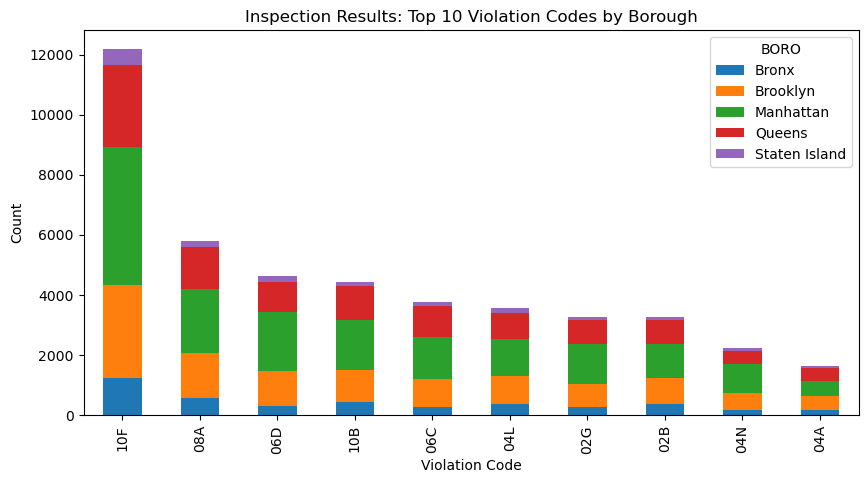

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Count the occurrences of each violation code for each borough
violation_counts = df_filtered.groupby('BORO')['VIOLATION CODE'].value_counts().unstack().fillna(0)

# Get the top 10 violation codes across all boroughs
top_violation_codes = violation_counts.sum().nlargest(10).index

# Filter the violation counts for the top 10 violation codes and transpose the DataFrame
violation_counts = violation_counts[top_violation_codes].T

# Plot a grouped bar plot
violation_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Inspection Results: Top 10 Violation Codes by Borough')
plt.xlabel('Violation Code')
plt.ylabel('Count')
plt.show()

We also wanted to get an insight into the counts of inspection results for the latest years. While wanting to do that we also wanted to see if this could include the distribution in counts for each violation. We fould that through the years the counts have increased alot and there's a clear pattern of the Facility Sanitation being the most frequent violation.

In [11]:
violation_colors = {
    'Facility Sanitation': '#a2cffe',  # Light pastel blue
    'Pest Control': '#cbf7d4',  # Light pastel green
    'Temperature Control': '#faf0af',  # Light yellow
    'Facility Maintenance': '#b8d8d8',  # Light blue
    'Staff Hygiene': '#7a9d96',  # Soft teal
    'Food Sourcing and Labeling': '#7ed6df',  # Soft cyan
    'Chemical Safety': '#b8e4f0'   # Sky blue
}

import plotly.graph_objects as go

# Assuming 'all_violations_df' is already prepared and has 'Inspection Date' as datetime
all_violations_df['INSPECTION DATE'] = pd.to_datetime(all_violations_df['INSPECTION DATE'])

# Filter data to include only the range from 2021 to 2024
filtered_data = all_violations_df[(all_violations_df['INSPECTION DATE'] >= '2022-01-01') & (all_violations_df['INSPECTION DATE'] <= '2024-12-31')]

# Group by 'Inspection Date' and 'Group', then count occurrences
grouped_data = filtered_data.groupby(['INSPECTION DATE', 'Group']).size().unstack(fill_value=0)

# Resample data to monthly frequency, summing the counts
monthly_data = grouped_data.resample('W').sum()

# Create the main plot
fig = go.Figure()
for col in monthly_data.columns:
    fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data[col], name=col, mode='lines', line=dict(color=violation_colors.get(col, '#000000'))))

# Update layout to add the range slider and change the background color
fig.update_layout(
    title='Monthly Violation Counts Over Time (2021-2024)',
    plot_bgcolor='rgba(250, 250, 250, 0.8)',  # Bright white background
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(
        title='Count of Violations'
    )
)

# Show the plot
fig.show()

### 3.1 **Focus**: Cuisine Description
First off we're interesting in finding out if there's any correlation between the cuisine and the critical flags or the cuisine of the violation codes - as those would be very interesting to find a pattern in. Though, we did not find this and this too was very equal when looking at the critical flag. 

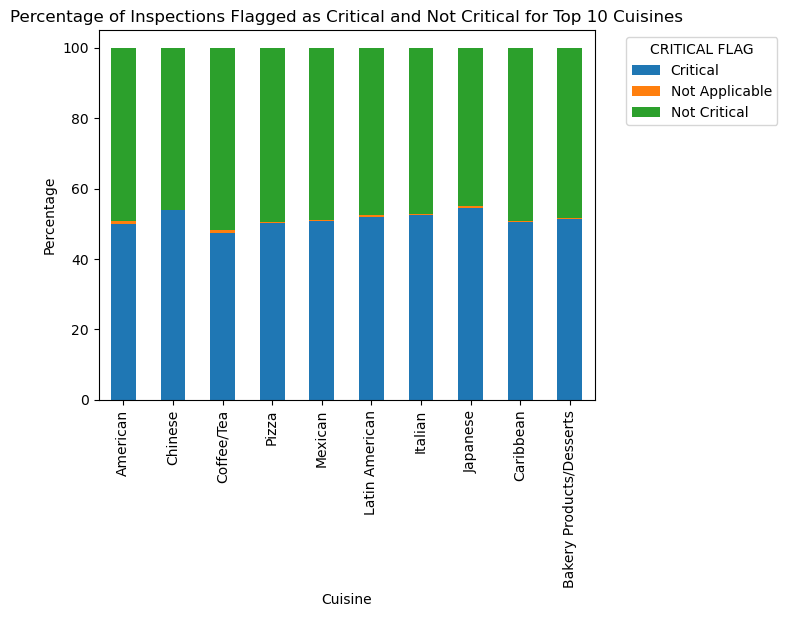

In [12]:
import matplotlib.pyplot as plt

# Count the number of inspections for each cuisine and flag
counts = df_filtered.groupby(['CUISINE DESCRIPTION', 'CRITICAL FLAG']).size().unstack(fill_value=0)

# Calculate the total number of inspections for each cuisine
totals = counts.sum(axis=1)

# Calculate the percentage of inspections flagged as 'Critical' and 'Not Critical' for each cuisine
percentages = counts.divide(totals, axis=0) * 100

# Get the top 10 cuisines with the most inspections
top_10_cuisines = totals.nlargest(10).index

# Get the percentages for the top 10 cuisines
top_10_percentages = percentages.loc[top_10_cuisines]

# Plot a stacked bar chart of the percentages
top_10_percentages.plot(kind='bar', stacked=True)
plt.title('Percentage of Inspections Flagged as Critical and Not Critical for Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Percentage')
plt.legend(title='CRITICAL FLAG', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Maps

### Name of Restaurant

In [13]:
import dash
from dash import html, dcc, Input, Output
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)


app.layout = html.Div([
    html.H1("Proportional DBA Histogram for Critical Flags"),
    dcc.Dropdown(
        id='food-category-dropdown',
        options=[{'label': k, 'value': k} for k in food_categories.keys()],
        value=list(food_categories.keys())[0],  # default to first category
        clearable=False
    ),
    dcc.Graph(id='dba-proportional-histogram')
])

@app.callback(
    Output('dba-proportional-histogram', 'figure'),
    [Input('food-category-dropdown', 'value')]
)
def update_histogram(selected_category):
    # Filter based on selected food category
    relevant_cuisines = food_categories[selected_category]
    category_df = df_filtered[df_filtered['CUISINE DESCRIPTION'].isin(relevant_cuisines)]
    
    # Compute total and critical counts per DBA
    total_counts = category_df['DBA'].value_counts()
    critical_counts = category_df[category_df['CRITICAL FLAG'] == 'Critical']['DBA'].value_counts()
    
    # Filter DBAs that have a count higher than 10
    total_counts = total_counts[total_counts > 10]
    critical_counts = critical_counts[critical_counts.index.isin(total_counts.index)]
    
    # Calculate the proportion of critical inspections
    proportion_critical = (critical_counts / total_counts).fillna(0)  # fill NA for DBAs with no critical flags
    
    # Get the top 15 DBAs based on the highest proportion of critical flags
    top_dba_proportions = proportion_critical.nlargest(15)
    
    # Create a bar chart using Plotly
    fig = px.bar(top_dba_proportions, 
                 x=top_dba_proportions.index, 
                 y=top_dba_proportions.values, 
                 title=f'Top 15 DBAs by Proportion of Critical Flags in {selected_category}',
                 labels={'index': 'DBA', 'y': 'Proportion of Critical Inspections'},
                 color=top_dba_proportions.values,
                 color_continuous_scale=px.colors.sequential.Viridis)
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


AttributeError: 'tuple' object has no attribute 'tb_frame'

## **4.0 Genre**
We have chosen to use the Magazine Style Genre, since we believe this genre has the best combination of text and visualization for us to correctly communicate with the readers when making statements in the text and supporting them with the visualizations. 

The tools used to create our Data Story were:
* *Categories of Visual Narrative*:
    * *Visual Structuring*: We focused on using a consistent color scheme and using the same fonts in order to create a Consistent Visual Platform. 
    
    * *Highlighting*: We used Close-Ups/Zoomings since some of the plots have the feature to zoom into maps or limit a time period in order to get a close-up on it. Furthermore, Feature Distinction is used multiple times when the plots focus on separated cuisines and violation codes, comparing them to each other and themselves.

    * *Transition Guidance*: The transition between plots is simply the text between them. 

* *Categories of Narrative Structure*: 
    * *Ordering*: The narrative ordering is Linear, as the intention is for the reader to read the story chronologically from the beginning to the end

    * *Interactivity*: One of the most used is Filtering/Selection/Search, given the fact that we want the reader to explore based on their desire for their dinner. Some plots allow the reader to filter between cuisines, and some allow the reader to select a given time period to focus on. Furthermore, all plots include Hover Highlighting since all plots are interactive with pop-up tooltip descriptions that provide further information about the visualization.
    
    * *Messaging*: The data story begins with a caption and an introductory text that is supposed to catch the attention of the reader. Furthermore, at the end of our data story, we come with a few concluding and summarizing lines. Lastly, all plots have figure descriptions and headlines.

## **5.0 Visualizations**
The description for each plot is below it.

In [ ]:
violation_colors = {
    'Facility Sanitation': '#91b8e4',  # Darker pastel blue
    'Pest Control': '#97c8a2',  # Darker pastel green
    'Temperature Control': '#e4d77d',  # Darker light yellow
    'Facility Maintenance': '#a8c8c8',  # Darker light blue
    'Staff Hygiene': '#6a8d86',  # Darker soft teal
    'Food Sourcing and Labeling': '#6dc6bf',  # Darker soft cyan
    'Chemical Safety': '#a8d4e0'   # Darker sky blue
}

import plotly.graph_objects as go


# Assuming 'all_violations_df' is already prepared and has 'INSPECTION DATE' as datetime
all_violations_df['INSPECTION DATE'] = pd.to_datetime(all_violations_df['INSPECTION DATE'])

# Filter data to include only the range from 2021 to 2024
filtered_data = all_violations_df[(all_violations_df['INSPECTION DATE'] >= '2022-01-01') & (all_violations_df['INSPECTION DATE'] <= '2024-12-31')]

# Group by 'Inspection Date' and 'Group', then count occurrences
grouped_data = filtered_data.groupby(['INSPECTION DATE', 'Group']).size().unstack(fill_value=0)

# Resample data to monthly frequency, summing the counts
monthly_data = grouped_data.resample('ME').sum()

# Create the main plot
violation_colors = {
    'Facility Sanitation': '#91b8e4',  # Darker pastel blue
    'Pest Control': '#97c8a2',  # Darker pastel green
    'Temperature Control': '#e4d77d',  # Darker light yellow
    'Facility Maintenance': '#a8c8c8',  # Darker light blue
    'Staff Hygiene': '#6a8d86',  # Darker soft teal
    'Food Sourcing and Labeling': '#6dc6bf',  # Darker soft cyan
    'Chemical Safety': '#a8d4e0'   # Darker sky blue
}

fig = go.Figure()
for col in monthly_data.columns:
    fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data[col], name=col, mode='lines', line=dict(color=violation_colors.get(col, '#000000'))))

# Update layout to add the range slider and change the background color
fig.update_layout(
    title='Monthly Violation Counts Over Time (2022-2024)',
    plot_bgcolor='rgba(240, 240, 240, 0.8)',  # Light grey background for better visibility
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    ),
    yaxis=dict(
        title='Count of Violations'
    ),
    annotations=[
        dict(
            x=0.5,
            y=-0.15,
            xref='paper',
            yref='paper',
            text='Select Range',
            showarrow=False,
            font=dict(
                size=12,
                color="black"
            ),
            align='center'
        )
    ]
)

# Save the plot as an HTML file
fig.write_html("monthly_violation_counts.html")

# Show the plot
fig.show()


## 5.1 Line-Plot
The first plot we introduce is an interactive line plot that provides readers with insights into both the counts of each violation and the distribution between the most common and uncommon violations. Readers can adjust the time period displayed on the plot and choose which violation codes to view. Additionally, a pop-up tooltip displays the exact count of violations for each month. By showing the counts over time, the plot also offers insights into the frequency of these documented results. We believe this plot is an excellent starting point because it is relatively simple to understand, despite its numerous features. Readers have the option to dive deeper into the details as they choose.

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Re-check how data is aggregated and ensure all categories are captured
def get_data_for_group(group_list):
    filtered_df = all_violations_df[all_violations_df['Group'].isin(group_list)]
    counts = filtered_df.groupby('CRITICAL FLAG').size()
    return counts

# Collect and aggregate the data
group_data = {}
for group in all_violations_df['Group'].unique():
    group_data[group] = get_data_for_group([group])

# Convert data into a DataFrame and fill missing values
group_counts = pd.DataFrame(group_data).T.fillna(0)

# Calculate the total number of inspections for each category
totals = group_counts.sum(axis=1)

# Add percentages to the dataframe for hover information
group_counts['Critical (%)'] = (group_counts['Critical'] / totals * 100).round(2)
group_counts['Not Critical (%)'] = (group_counts['Not Critical'] / totals * 100).round(2)

fig = go.Figure()

# Add bars for critical inspections
fig.add_trace(go.Bar(
    x=group_counts.index,
    y=group_counts['Critical'],
    name='Critical',
    hovertext=[f'{c} inspections ({p}%)' for c, p in zip(group_counts['Critical'], group_counts['Critical (%)'])],
    hoverinfo='text',
    marker_color='#f4a3a8' 
))

# Add bars for not critical inspections
fig.add_trace(go.Bar(
    x=group_counts.index,
    y=group_counts['Not Critical'],
    name='Not Critical',
    hovertext=[f'{c} inspections ({p}%)' for c, p in zip(group_counts['Not Critical'], group_counts['Not Critical (%)'])],
    hoverinfo='text',
    marker_color='#a8d8ba' 
))

# Update the layout to stack the bars, and adjust height
fig.update_layout(
    barmode='stack',
    title='Total Inspections and Criticality by Violation Group',
    xaxis_title='Violation Group',
    yaxis_title='Count of Inspections',
    legend_title='CRITICAL FLAG',
    xaxis_tickangle=-45,
    height=600  
)

# Save the figure as an HTML file
fig.write_html("total_inspections_criticality.html")

# Show the figure
fig.show()

## 5.2 Bar-plot
The second plot provides readers with insights into the significance of hygiene criticality conditions. It demonstrates that if a violation of temperature control is recorded, the likelihood of the restaurant being flagged as critical is 100%. In contrast, although Facility Sanitation is the most frequent violation, it only results in a critical flag about 30% of the time.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def assign_group(code):
    for group, codes in violation_groups.items():
        if code in codes:
            return group
    return None  # Return None if code doesn't belong to any group

def prepare_data(cuisine):
    cuisine_list = food_categories[cuisine]
    filtered_df = df_filtered[df_filtered['CUISINE DESCRIPTION'].isin(cuisine_list)]
    filtered_df['Group'] = filtered_df['VIOLATION CODE'].apply(assign_group)
    filtered_df.dropna(subset=['Group'], inplace=True)  # Drop rows with None in 'Group' column
    return filtered_df['Group'].value_counts()

# Define a custom color sequence based on violation groups
colors = {
    'Facility Sanitation': '#91b8e4',  # Darker pastel blue
    'Pest Control': '#97c8a2',  # Darker pastel green
    'Temperature Control': '#e4d77d',  # Darker light yellow
    'Facility Maintenance': '#a8c8c8',  # Darker light blue
    'Staff Hygiene': '#6a8d86',  # Darker soft teal
    'Food Sourcing and Labeling': '#6dc6bf',  # Darker soft cyan
    'Chemical Safety': '#a8d4e0',   # Darker sky blue
    'Other': '#d3d3d3'  # Light grey for other groups
}

def plot_all_cuisines():
    # Generate titles with bold text using HTML tags
    titles = ['<b>{}</b>'.format(cuisine) for cuisine in food_categories.keys()]

    # Create a subplot grid: 2 rows x 5 columns with adequate spacing
    fig = make_subplots(rows=2, cols=5, specs=[[{'type': 'domain'}] * 5] * 2,
                        subplot_titles=titles,
                        vertical_spacing=0.1)  # Adjust vertical spacing

    row = 1
    col = 1
    for i, cuisine in enumerate(food_categories.keys()):
        group_counts = prepare_data(cuisine)
        if not group_counts.empty:
            sorted_counts = group_counts.sort_values(ascending=False)  # Sort counts in descending order
            sorted_groups = sorted_counts.index.tolist()  # Get the sorted groups
            sorted_colors = [colors[group] for group in sorted_groups]  # Assign colors based on violation groups

            fig.add_trace(go.Pie(labels=sorted_counts.index, values=sorted_counts.values, name=cuisine,
                                 hoverinfo='label+percent+name', textinfo='percent',
                                 hovertemplate="%{label}: %{value} (<b>%{percent}</b>)",
                                 marker_colors=sorted_colors),  # Use the sorted color sequence
                          row=row, col=col)
        col += 1
        if col > 5:
            col = 1
            row += 1

    # Update the layout to improve legibility and aesthetics
    fig.update_layout(
        height=1000,  
        width=1500,  
        title_text="Violation Group Distribution by Cuisine",
        legend_title="Violation Groups",
        legend=dict(
            x=0.5,  
            y=-0.1,  
            xanchor="center",  
            orientation="h", 
            font=dict(size=10, color="black"),  
            bgcolor="white",  
            bordercolor="Black",
            borderwidth=1,
            itemsizing='constant', 
            itemwidth=50  
        ),
        margin=dict(b=200) 
    )
    
    # Save fig as png 
    fig.write_image("piechart.png")

    fig.show()

plot_all_cuisines()

/var/folders/m4/lvsr74wx0q925cvzc6z0g13r0000gn/T/ipykernel_82014/2782268677.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m4/lvsr74wx0q925cvzc6z0g13r0000gn/T/ipykernel_82014/2782268677.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m4/lvsr74wx0q925cvzc6z0g13r0000gn/T/ipykernel_82014/2782268677.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

#### **5.3 Pie-charts**
The third plot showcases pie charts for various cuisines, illustrating the distribution of different violation codes recorded for each. These visuals offer readers insights into the dominant violations in each cuisine. Despite all pie charts sharing the same hierarchy regarding the most prevalent violation, they still provide valuable insights. When considering the information from the second plot, we can draw conclusions about each cuisine. For example, we understand that violations related to Temperature Control or Staff Hygiene are more critical than those related to Facility Sanitation.

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd

# Define colors for plotting
colors = [
    '#a2cffe', '#cbf7d4', '#faf0af', '#b8d8d8', '#7a9d96', '#7ed6df', '#b8e4f0', '#e7d7c1', '#ffcba4', '#a0ced9', '#d1e8e2', '#f9d5e5', '#eeac99', '#9dc3c1', '#c4def6', '#f6e5f5', '#f3eac2', '#d5e1df', '#f4c2c2', '#99c1de' 
]



def plot_data(inspections_threshold, selected_category):
    relevant_cuisines = food_categories[selected_category]
    filtered_df = df[(df['CUISINE DESCRIPTION'].isin(relevant_cuisines)) & (df['CRITICAL FLAG'] == 'Not Critical')]

    # Calculate 'Critical' flags for each DBA in the filtered DataFrame
    critical_counts = filtered_df['DBA'].value_counts()

    # Only consider DBAs with a minimum number of inspections
    total_inspections = df[df['DBA'].isin(critical_counts.index)]['DBA'].value_counts()
    valid_dbas = total_inspections[total_inspections >= inspections_threshold].index

    critical_counts_filtered = critical_counts[critical_counts.index.isin(valid_dbas)]
    proportion_critical = (critical_counts_filtered / total_inspections.loc[critical_counts_filtered.index]).fillna(0)

    # Create a DataFrame to display both the proportion and total count
    result_df = pd.DataFrame({
        'Proportion Not Critical': proportion_critical,
        'Total Inspections': total_inspections.loc[proportion_critical.index]
    }).sort_values(by='Proportion Not Critical', ascending=False).head(20)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(result_df.index, result_df['Proportion Not Critical'], color=colors[:len(result_df)])
    plt.xlabel('Proportion Not Critical')
    plt.ylabel('DBA')
    plt.title(f'Proportion of Not Critical Flags for Top 20 DBAs in {selected_category} with at least {inspections_threshold} Inspections')
    plt.gca().invert_yaxis()
    plt.show()

# Widget to select cuisine category
category_selector = widgets.Dropdown(
    options=list(food_categories.keys()),
    value='Burgers',
    description='Category:',
    disabled=False,
)

# Interactive plot adjustment
widgets.interact(plot_data, inspections_threshold=widgets.IntSlider(min=1, max=150, step=1, value=25), selected_category=category_selector)


interactive(children=(IntSlider(value=25, description='inspections_threshold', max=150, min=1), Dropdown(descr…

<function __main__.plot_data(inspections_threshold, selected_category)>

#### **5.4 Bar-Plot**
The final plot is another bar plot. Its purpose is to assist readers in selecting the best dining option based on their preferred cuisine. However, another crucial factor to consider is the total number of inspections each restaurant or chain has had. For instance, there are numerous McDonald's locations in NYC, resulting in a high count for this chain. If we were to set the minimum inspection count to just 1, many restaurants would have a 100% Not Critical/Critical proportion, especially if they closed down or changed names after their first inspection.

Thus, by setting the minimum inspection count to a higher number, we can focus on displaying the largest restaurant chains. This approach aids readers in making informed decisions among these leading options.

In [25]:
import geopandas as gpd

geojson = 'Modified Zip Code Tabulation Areas (MODZCTA)_20240414.geojson'

geojson_data = gpd.read_file(geojson)

# Sort df by ZIPCODE acecnding
df = df.sort_values(by='ZIPCODE')

# String of 5 first digits of ZIPCODE
df['ZIPCODE'] = df['ZIPCODE'].astype(str).str[:5]

# Merge the two dataframes
df = df.merge(geojson_data, left_on='ZIPCODE', right_on='modzcta')

# Sort df_filtered by ZIPCODE ascending
df_filtered = df_filtered.sort_values(by='ZIPCODE')

# String of 5 first digits of ZIPCODE
df_filtered['ZIPCODE'] = df_filtered['ZIPCODE'].astype(str).str[:5]

# Merge the two dataframes
df_filtered = df_filtered.merge(geojson_data, left_on='ZIPCODE', right_on='modzcta')

unique_zipcodes = df_filtered['ZIPCODE'].unique()
# Drop rows with NaN values in the 'SCORE' column
df_filtered = df_filtered.dropna(subset=['SCORE'])

unique_zipcodes = df_filtered['ZIPCODE'].unique()

# Initialize lists to store average scores for each cuisine category
average_score_burger = []
average_score_sandwiches = []
average_score_hotdogs = []
average_score_mexican = []
average_score_pizza = []
average_score_asian = []
average_score_bakery = []
average_score_salads = []
average_score_beverages = []
average_score_seafood = []

for zipcode in unique_zipcodes:
    average_score_burger.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Burgers'])]['SCORE'].mean())
    average_score_sandwiches.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Sandwiches'])]['SCORE'].mean())
    average_score_hotdogs.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Hotdogs'])]['SCORE'].mean())
    average_score_mexican.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Mexican'])]['SCORE'].mean())
    average_score_pizza.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Pizza'])]['SCORE'].mean())
    average_score_asian.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Asian'])]['SCORE'].mean())
    average_score_bakery.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Bakery, Desserts & Snacks'])]['SCORE'].mean())
    average_score_salads.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Salads/Vegan'])]['SCORE'].mean())
    average_score_beverages.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Beverages & More'])]['SCORE'].mean())
    average_score_seafood.append(df_filtered[(df_filtered['ZIPCODE'] == zipcode) & df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Seafood'])]['SCORE'].mean())
    
polygon = geojson_data['geometry']

# Add all to new df 
df_zipcode = pd.DataFrame({'ZIPCODE': unique_zipcodes,'geometry': polygon[1:], 'AVERAGE SCORE BURGER': average_score_burger, 'AVERAGE SCORE SANDWICHES': average_score_sandwiches, 'AVERAGE SCORE HOTDOGS': average_score_hotdogs, 'AVERAGE SCORE MEXICAN': average_score_mexican, 'AVERAGE SCORE PIZZA': average_score_pizza, 'AVERAGE SCORE ASIAN': average_score_asian, 'AVERAGE SCORE BAKERY': average_score_bakery, 'AVERAGE SCORE SALADS': average_score_salads, 'AVERAGE SCORE BEVERAGES': average_score_beverages, 'AVERAGE SCORE SEAFOOD': average_score_seafood})

gdf = gpd.GeoDataFrame(df_zipcode, geometry='geometry')

import plotly.express as px
import geopandas as gpd

initial_location = [40.7128, -74.0060]  # New York City coordinates for the map center

# Define the average scores mapping
average_scores = {
    'Burgers': 'AVERAGE SCORE BURGER',
    'Sandwiches': 'AVERAGE SCORE SANDWICHES',
    'Hotdogs': 'AVERAGE SCORE HOTDOGS',
    'Mexican': 'AVERAGE SCORE MEXICAN',
    'Pizza': 'AVERAGE SCORE PIZZA',
    'Asian': 'AVERAGE SCORE ASIAN',
    'Bakery, Desserts & Snacks': 'AVERAGE SCORE BAKERY',
    'Salads\Vegan': 'AVERAGE SCORE SALADS',
    'Beverages & More': 'AVERAGE SCORE BEVERAGES',
    'Seafood': 'AVERAGE SCORE SEAFOOD'
}
# Function to create and save a choropleth map for each food category
def create_plotly_map(category, path_save, gdf):
    # Handle null values by creating a new column for visualization
    gdf['color_column'] = gdf[category].fillna(-1)  # Set null scores to -1
    
    # Check your column names
    print(gdf.columns)

    # Define discrete color scale, including gray for null values
    color_scale = [
        [0.00, "#808080"],  # Gray for null values
        [0.01, "#77dd77"],  # Green for scores from 0 to 14
        [0.35, "#77dd77"],  # Green continues until 14
        [0.35, "#fdfd96"],  # Yellow starts from 14
        [0.70, "#fdfd96"],  # Yellow continues until 28
        [0.70, "#ff6961"],  # Red starts from 28
        [1.00, "#ff6961"]   # Red continues above 28
    ]

    fig = px.choropleth_mapbox(gdf, 
                               geojson=gdf.geometry.__geo_interface__, 
                               locations=gdf.index, 
                               color='color_column',  # Use new column for color
                               color_continuous_scale=color_scale,
                               range_color=(-1, 42),
                               mapbox_style="carto-positron",
                               zoom=8, 
                               center={"lat": initial_location[0], "lon": initial_location[1]},
                               opacity=0.5,
                               labels={'ZIPCODE': 'Zip Code', 'color_column': 'Average Score'},
                               hover_data={'ZIPCODE': True, 'color_column': True}
                              )

    # Customize the hover data using the correct references
    fig.update_traces(hovertemplate='Zip Code: %{customdata[0]}<br>Average Score: %{customdata[1]:.2f}<extra></extra>')

    # Update hover label layout
    fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell"))
    
    # Define legend title and color scale guide
    fig.update_layout(coloraxis_colorbar=dict(
        title="Average Score",
        tickvals=[-2, 0, 15, 30],
        ticktext=['No Data', '0', '14', '28+'],
        ))

    # Save the figure without spaces in the filename
    filename = category.replace(' ', '')  # Removing spaces
    fig.write_html(f'{path_save}choropleth_{filename}.html')

# Path where the HTML maps will be saved
path_save = '/Users/thomasstycke/Desktop/DTU/SocialData/Assignment3/'

# Iterate over each food category and create maps
for category in average_scores.keys():
    create_plotly_map(average_scores[category], path_save, gdf)


Index(['ZIPCODE', 'geometry', 'AVERAGE SCORE BURGER',
       'AVERAGE SCORE SANDWICHES', 'AVERAGE SCORE HOTDOGS',
       'AVERAGE SCORE MEXICAN', 'AVERAGE SCORE PIZZA', 'AVERAGE SCORE ASIAN',
       'AVERAGE SCORE BAKERY', 'AVERAGE SCORE SALADS',
       'AVERAGE SCORE BEVERAGES', 'AVERAGE SCORE SEAFOOD', 'color_column'],
      dtype='object')
Index(['ZIPCODE', 'geometry', 'AVERAGE SCORE BURGER',
       'AVERAGE SCORE SANDWICHES', 'AVERAGE SCORE HOTDOGS',
       'AVERAGE SCORE MEXICAN', 'AVERAGE SCORE PIZZA', 'AVERAGE SCORE ASIAN',
       'AVERAGE SCORE BAKERY', 'AVERAGE SCORE SALADS',
       'AVERAGE SCORE BEVERAGES', 'AVERAGE SCORE SEAFOOD', 'color_column'],
      dtype='object')
Index(['ZIPCODE', 'geometry', 'AVERAGE SCORE BURGER',
       'AVERAGE SCORE SANDWICHES', 'AVERAGE SCORE HOTDOGS',
       'AVERAGE SCORE MEXICAN', 'AVERAGE SCORE PIZZA', 'AVERAGE SCORE ASIAN',
       'AVERAGE SCORE BAKERY', 'AVERAGE SCORE SALADS',
       'AVERAGE SCORE BEVERAGES', 'AVERAGE SCORE SEAFOOD', 'col

In [24]:
# Print worst 20 SEAFOOD with unique CAMIS 
worst_seafood = df_filtered[df_filtered['CUISINE DESCRIPTION'].isin(food_categories['Seafood'])].drop_duplicates(subset='CAMIS').sort_values(by='SCORE', ascending=False).head(20)
print(worst_seafood[['DBA', 'STREET', 'SCORE', 'CAMIS']])

                                         DBA                STREET  SCORE     CAMIS
19292                  LIGHTHOUSE FISHMARKET      EAST  117 STREET   65.0  50108040
21279                     BURGOS FISH MARKET        DYCKMAN STREET   53.0  50127874
39768                   BLUE FIN BAR & GRILL       NOSTRAND AVENUE   51.0  50101281
2725                                  OCEANS     PARK AVENUE SOUTH   49.0  50099109
2600                             BAIT & HOOK      EAST   14 STREET   47.0  50104486
51610        SUSHI KINGDOM AND ASIAN FUSHION               MAIN ST   45.0  50093869
30259                      BOBO'S CRAB SHACK  CO OP CITY BOULEVARD   37.0  50109755
1470                 SENG SEAFOOD RESTAURANT         EAST BROADWAY   35.0  50113198
11119                         LUKE'S LOBSTER              3 AVENUE   33.0  50011303
13110                           SHAKING CRAB              9 AVENUE   32.0  50102038
26795                      BOBO'S CRAB SHACK       GRAND CONCOURSE   28.0  5

#### **5.4 Bar-Plot**
The final plot is another bar plot. Its purpose is to assist readers in selecting the best dining option based on their preferred cuisine. However, another crucial factor to consider is the total number of inspections each restaurant or chain has had. For instance, there are numerous McDonald's locations in NYC, resulting in a high count for this chain. If we were to set the minimum inspection count to just 1, many restaurants would have a 100% Not Critical/Critical proportion, especially if they closed down or changed names after their first inspection.

Thus, by setting the minimum inspection count to a higher number, we can focus on displaying the largest restaurant chains. This approach aids readers in making informed decisions among these leading options.


## **6.0 Discussion**
The primary challenge we encountered with the data was the absence of a clear pattern. Initially, we anticipated discovering significant trends to focus on, but during our analysis, we observed that most distributions were evenly split, often around a 50/50 ratio. We explored various data filtering methods to understand if this distribution was influenced by our approach, conducting analyses on both processed and unprocessed data. However, we found that the 50/50 distribution e.g. between Critical and Not Critical categories persisted.

## **7.0 Contributions**

* **Data analysis** 50% s214715 and 50% s214742. 
* **Notebook Setup** was 50% s214715 and 50% s214742. 
* **Website Setup** was 50% s214715 and 50% s214742. 